#Loading Datasets

In [1]:
!unzip /content/Train_60.zip
!unzip /content/Test_20.zip

Archive:  /content/Train_60.zip
   creating: Train_60/
   creating: Train_60/__MACOSX/
  inflating: Train_60/__MACOSX/._Train_60  
   creating: Train_60/__MACOSX/Train_60/
  inflating: Train_60/__MACOSX/Train_60/._X_Train_Data_Input.csv  
  inflating: Train_60/__MACOSX/Train_60/._Y_Train_Data_Target.csv  
  inflating: Train_60/__MACOSX/Train_60/._checksum.py  
  inflating: Train_60/__MACOSX/Train_60/._SHA_256.txt  
  inflating: Train_60/__MACOSX/Train_60/._Instructions.txt  
   creating: Train_60/Train_60/
  inflating: Train_60/Train_60/Instructions.txt  
  inflating: Train_60/Train_60/checksum.py  
  inflating: Train_60/Train_60/SHA_256.txt  
  inflating: Train_60/Train_60/Y_Train_Data_Target.csv  
  inflating: Train_60/Train_60/X_Train_Data_Input.csv  
Archive:  /content/Test_20.zip
   creating: Test_20/__MACOSX/
  inflating: Test_20/__MACOSX/._Test_20  
   creating: Test_20/__MACOSX/Test_20/
  inflating: Test_20/__MACOSX/Test_20/._checksum.py  
  inflating: Test_20/__MACOSX/Test_20/

#Data Preprocessing And Visualization

In [81]:
import pandas as pd
X_train, X_test, y_train, y_test = pd.read_csv('Train_60/Train_60/X_Train_Data_Input.csv'),pd.read_csv('Test_20/Test_20/X_Test_Data_Input.csv') , pd.read_csv('Train_60/Train_60/Y_Train_Data_Target.csv'), pd.read_csv('Test_20/Test_20/Y_Test_Data_Target.csv')

In [82]:
X_train.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,...,0,0,NaN,0.00339,0.0,0,0.0,0,0,0


In [83]:
y_train.head()

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0
2,22ba388e7dd14c13342c49e75fc29dda,0
3,59f9b981472d97342587fb3e6392aeb1,1
4,f6317cf7ecf126859804eddff279aead,0


In [84]:
import pandas as pd

X_train = X_train.drop(X_train.columns[0], axis=1)
X_test = X_test.drop(X_test.columns[0], axis=1)
y_train = y_train.drop(y_train.columns[0], axis=1)
y_test = y_test.drop(y_test.columns[0], axis=1)

df_train=pd.concat([X_train, y_train], axis=1)
# Calculate correlation matrix
correlation_matrix = df_train.corr()

# Display the correlation with the target
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print("Correlation with target:\n", correlation_with_target)

Correlation with target:
 target      1.000000
Column18    0.727999
Column19    0.258609
Column17    0.248896
Column20    0.135516
Column21    0.119171
Column16    0.087492
Column5     0.001221
Column14    0.000305
Column9    -0.000796
Column7    -0.004858
Column15   -0.006846
Column0    -0.064456
Column11   -0.086418
Column13   -0.094361
Column10   -0.097229
Column3    -0.098067
Column6    -0.102652
Column2    -0.114910
Column4    -0.121181
Column12   -0.128421
Column8    -0.129717
Column1    -0.374542
Name: target, dtype: float64


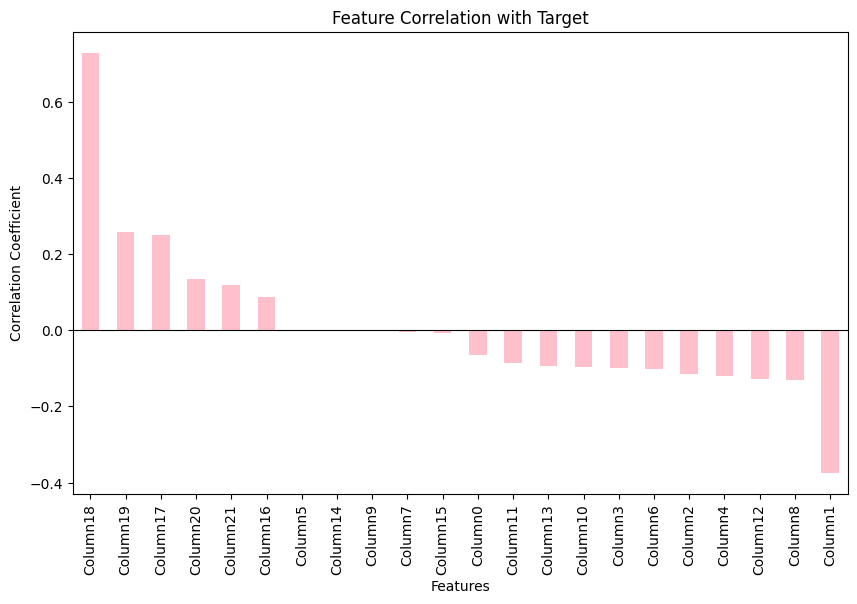

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the target column
correlation_with_target = correlation_with_target.drop('target')

plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='pink')
plt.title('Feature Correlation with Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')
plt.show()


In [88]:
#Check for duplicates between features and target
for column in X_train.columns:
    if X_train[column].equals(y_train.squeeze()):
        print(f"Potential leakage found in feature: {column}")

In [87]:
#Check for high variance or specific patterns in data
highly_correlated_features = correlation_with_target[correlation_with_target > 0.9].index.tolist()
if len(highly_correlated_features) > 0:
    print(f"Potentially leaked features (high correlation): {highly_correlated_features}")
else:
    print("No significant leakage detected based on correlation.")

No significant leakage detected based on correlation.


In [89]:
#Check Null Values
X_train.isnull().sum()

,0
Column0,9
Column1,0
Column2,0
Column3,126303
Column4,127710
Column5,167180
Column6,3850
Column7,0
Column8,3850
Column9,732137


In [90]:
#Drop Columns
columns_to_drop = ['Column9', 'Column14', 'Column21', 'Column20']

X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

In [91]:
X_train = X_train.sample(n=500000, random_state=42)

In [92]:
X_train.shape

(500000, 18)

In [93]:
y_train = y_train.sample(n=500000, random_state=42)

In [94]:
y_train.shape

(500000, 1)

In [95]:
X_test = X_test.sample(n=100000, random_state=42)

In [96]:
X_test.shape

(100000, 18)

In [97]:
y_test = y_test.sample(n=100000, random_state=42)

In [98]:
y_test.shape

(100000, 1)

In [99]:
#Missing Values Handling
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

#Model Building And Result

In [100]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import gaussian_filter

# Apply Standard Scaler to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply power transform to the features
power_transformer = PowerTransformer()
X_transformed = power_transformer.fit_transform(X_train)
X_transformed_test = power_transformer.transform(X_test)

# Apply Gaussian filter to smooth the features
X_transformed = gaussian_filter(X_transformed, sigma=1)  # Adjust sigma for smoothing
X_transformed_test = gaussian_filter(X_transformed_test, sigma=1)

# Train the Random Forest classifier
random_forest_1 = RandomForestClassifier(random_state=42)
random_forest_1.fit(X_transformed, y_train)

# Extract the feature representations from the first Random Forest
rf_features = random_forest_1.apply(X_transformed_test)

# Reshape the RF features for input to KNN
rf_features = rf_features.reshape(rf_features.shape[0], -1)

# Build the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(rf_features, y_test)

# Make predictions using the KNN model
knn_predictions = knn_model.predict(rf_features)

# Combine the KNN predictions with the RF features
combined_features = np.concatenate((rf_features, knn_predictions.reshape(-1, 1)), axis=1)

# Train the second Random Forest classifier on the combined features
random_forest_2 = RandomForestClassifier(random_state=42)
random_forest_2.fit(combined_features, y_test)

# Make predictions using the second Random Forest
rf2_predictions = random_forest_2.predict(combined_features)

# Calculate the accuracy of the second Random Forest
accuracy = accuracy_score(y_test, rf2_predictions)
print("Accuracy:", accuracy)
predictions_df = pd.DataFrame({
    'KNN Predictions': knn_predictions.reshape(-1)
})
predictions_df1 = pd.DataFrame(rf_features)
predictions_df2 = pd.DataFrame({
    'RF2_Prediction': rf2_predictions
})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 1.0


In [101]:
predictions_df.to_csv('knn_predictions.csv', index=False)
predictions_df1.to_csv('rf_features.csv', index=False)
predictions_df2.to_csv('rf2_predictions.csv', index=False)